<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Data-Driven Finance (a)

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## Financial Econometrics and Regression

In [1]:
import numpy as np

In [2]:
def f(x):
    return 2 + 1 / 2 * x

In [3]:
x = np.arange(-4, 5)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [4]:
y = f(x)
y

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [5]:
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [6]:
y

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [7]:
beta = np.cov(x, y, ddof=0)[0, 1] / x.var()
beta

np.float64(0.49999999999999994)

In [8]:
alpha = y.mean() - beta * x.mean()
alpha

np.float64(2.0)

In [9]:
y_ = alpha + beta * x

In [10]:
np.allclose(y_, y)

True

## Data Availability

In addition to a (paid) subscribtion to the Eikon Data API (https://developers.refinitiv.com/eikon-apis/eikon-data-apis), the following code requires the `eikon` Python package:

    pip install eikon

In [11]:
import eikon as ek
import configparser

ModuleNotFoundError: No module named 'eikon'

In [12]:
c = configparser.ConfigParser()
c.read('../aiif.cfg')  # adjust path

['../aiif.cfg']

In [13]:
import warnings
warnings.simplefilter('ignore')

In [14]:
ek.set_app_key(c['eikon']['app_id'])

In [15]:
ek.__version__

'1.1.18'

In [16]:
symbols = ['AAPL.O', 'MSFT.O', 'NFLX.O', 'AMZN.O']

In [17]:
data = ek.get_timeseries(symbols,
                         fields='CLOSE',
                         start_date='2019-07-01',
                         end_date='2020-07-01')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-07-01 to 2020-07-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  254 non-null    Float64
 1   MSFT.O  254 non-null    Float64
 2   NFLX.O  254 non-null    Float64
 3   AMZN.O  254 non-null    Float64
dtypes: Float64(4)
memory usage: 10.9 KB


In [19]:
data.tail()

CLOSE,AAPL.O,MSFT.O,NFLX.O,AMZN.O
Date,,,,
2020-06-25,91.21,200.34,465.91,137.729
2020-06-26,88.4075,196.33,443.4,134.6435
2020-06-29,90.445,198.44,447.24,134.019
2020-06-30,91.2,203.51,455.04,137.941
2020-07-01,91.0275,204.7,485.64,143.935


In [20]:
data = ek.get_timeseries('AMZN.O',
                         fields='*',
                         start_date='2023-09-25',
                         end_date='2023-09-26',
                         interval='minute')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 951 entries, 2023-09-25 08:01:00 to 2023-09-26 00:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    951 non-null    Float64
 1   LOW     951 non-null    Float64
 2   OPEN    951 non-null    Float64
 3   CLOSE   951 non-null    Float64
 4   COUNT   951 non-null    Int64  
 5   VOLUME  951 non-null    Int64  
dtypes: Float64(4), Int64(2)
memory usage: 57.6 KB


In [22]:
data.head()

AMZN.O,HIGH,LOW,OPEN,CLOSE,COUNT,VOLUME
Date,,,,,,
2023-09-25 08:01:00,130.2,129.52,130.02,130.06,100,3588
2023-09-25 08:02:00,130.17,130.05,130.05,130.12,54,3066
2023-09-25 08:03:00,130.16,130.0,130.12,130.01,60,4358
2023-09-25 08:04:00,130.13,130.0,130.13,130.05,8,1116
2023-09-25 08:05:00,130.1,130.0,130.06,130.0,42,1029


In [23]:
data_grid, err = ek.get_data(['AAPL.O', 'IBM', 'GOOG.O', 'AMZN.O'],
                             ['TR.TotalReturnYTD', 'TR.WACCBeta',
                              'YRHIGH', 'YRLOW',
                              'TR.Ebitda', 'TR.GrossProfit'])

In [24]:
data_grid

,Instrument,YTD Total Return,Beta,YRHIGH,YRLOW,EBITDA,Gross Profit
0,AAPL.O,37.187596,1.307688,198.23,124.17,130541000000.0,170782000000
1,IBM,4.656064,0.764522,153.21,115.545,13069000000.0,32688000000
2,GOOG.O,56.350727,1.041878,139.93,83.45,90771000000.000107,156633000000
3,AMZN.O,52.333333,1.188338,145.86,81.43,37752000000.0,225152000000


In addition to a (free paper trading) account with Oanda (http://oanda.com), the following code requires the `tpqoa` package:

    pip install --upgrade git+https://github.com/yhilpisch/tpqoa.git

In [25]:
import tpqoa

In [26]:
oa = tpqoa.tpqoa('../aiif.cfg')

In [27]:
oa.stream_data('BTC_USD', stop=1)

2023-10-06T20:55:00.089908499Z 27968.6 28014.5


In [28]:
data = ek.get_timeseries('AAPL.O',
                         fields='*',
                         start_date='2023-09-25 15:00:00',
                         end_date='2023-09-25 15:30:00',
                         interval='tick')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35845 entries, 2023-09-25 15:00:00.315000 to 2023-09-25 15:29:59.629000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALUE   35737 non-null  Float64
 1   VOLUME  35845 non-null  Int64  
dtypes: Float64(1), Int64(1)
memory usage: 910.1 KB


In [30]:
data.head(8)

AAPL.O,VALUE,VOLUME
Date,,
2023-09-25 15:00:00.315,174.89,40
2023-09-25 15:00:00.404,174.88,2
2023-09-25 15:00:00.432,174.885,6
2023-09-25 15:00:00.735,174.8881,1
2023-09-25 15:00:00.769,174.89,8
2023-09-25 15:00:00.769,174.89,2
2023-09-25 15:00:00.769,174.89,100
2023-09-25 15:00:00.769,174.89,78


In [31]:
news = ek.get_news_headlines('R:TSLA.O PRODUCTION',
                         date_from='2023-01-01',
                         date_to='2023-06-01',
                         count=7
                        )

In [32]:
news

,versionCreated,text,storyId,sourceCode
2023-05-25 21:30:08.278,2023-05-25 21:31:27.113000+00:00,FORD : ARE RAMPING UP PRODUCTION OF MUSTANG MA...,urn:newsml:newswire.refinitiv.com:20230525:nFW...,NS:RTRS
2023-05-23 05:34:08.180,2023-05-23 05:34:08.180000+00:00,Panasonic delays mass production of Tesla's 46...,urn:newsml:newswire.refinitiv.com:20230523:nIG...,NS:SHMM
2023-05-22 13:38:27.000,2023-05-22 13:38:27+00:00,FACTBOX-Ford strikes multiple lithium deals to...,urn:newsml:newswire.refinitiv.com:20230522:nL4...,NS:RTRS
2023-05-19 10:57:00.000,2023-05-19 10:57:45+00:00,Tesla 'serious' on establishing India producti...,urn:newsml:newswire.refinitiv.com:20230519:nL4...,NS:RTRS
2023-05-19 10:57:00.000,2023-05-19 10:57:00+00:00,"TESLA ""SERIOUS"" ABOUT PLANS TO SET UP PRODUCTI...",urn:newsml:newswire.refinitiv.com:20230519:nL4...,NS:RTRS
2023-05-18 05:33:20.000,2023-05-18 05:33:20+00:00,Panasonic plans new battery production capacit...,urn:newsml:newswire.refinitiv.com:20230518:nL1...,NS:RTRS
2023-05-16 20:42:56.045,2023-05-16 21:23:22.749000+00:00,TESLA INC CEO MUSK SAYS HOPEFULLY WILL START R...,urn:newsml:newswire.refinitiv.com:20230516:nFW...,NS:RTRS


In [33]:
storyId = news['storyId'].iloc[3]

In [12]:
from IPython.display import HTML

In [13]:
HTML(ek.get_news_story(storyId))

NameError: name 'ek' is not defined

In [36]:
import nlp
import requests

In [37]:
sources = [
    'https://nr.apple.com/dE0b1T5G3u',  # iPad Pro
    'https://nr.apple.com/dE4c7T6g1K',  # MacBook Air
    'https://nr.apple.com/dE4q4r8A2A',  # Mac Mini
]

In [38]:
html = [requests.get(url).text for url in sources]

In [39]:
data = [nlp.clean_up_text(t) for t in html]

In [40]:
data[0][0:1001]

'new ipad pro with all-screen designis most advanced, powerful ipad ever - apple applestoremacipadiphonewatchvisionairpodstv &amp; homeentertainmentaccessoriessupport 0+ newsroom apple stories popular topics airpods app store apple arcade apple tv+ company news education environment events health ipad iphone mac music store news tv &amp; home watch airpods app store apple arcade apple tv+ company news education environment events health ipad iphone mac music store news tv &amp; home watch apple newsroom needs your permission to enable desktop notifications when new articles are published press release october 30, 2018 new ipad pro with all-screen designis most advanced, powerful ipad ever 11-inch and 12.9-inch models feature liquid retina display, powerful a12x bionic chip and face id introducing the new ipad pro with all-screen design and next-generation performance. new york apple today introduced the new ipad pro with all-screen design and next-generation performance, marking the bi

In [41]:
from twitter import Twitter, OAuth

REMARK:

**The following seems to require a paid subscription for X.com (after Elon Musk takeover of Twitter) or some other form of preferred access. As of 07.10.2023.**

In [42]:
t = Twitter(auth=OAuth(c['twitter']['access_token'],
                       c['twitter']['access_secret_token'],
                       c['twitter']['api_key'],
                       c['twitter']['api_secret_key']),
            retry=True)

## Normative Theories Revisited

### Mean-Variance Portfolio Theory

In [14]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from scipy.optimize import minimize
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=5, suppress=True,
                   formatter={'float': lambda x: f'{x:6.3f}'})

In [15]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [16]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [46]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [17]:
symbols = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GLD']

In [18]:
rets = np.log(raw[symbols] / raw[symbols].shift(1)).dropna()

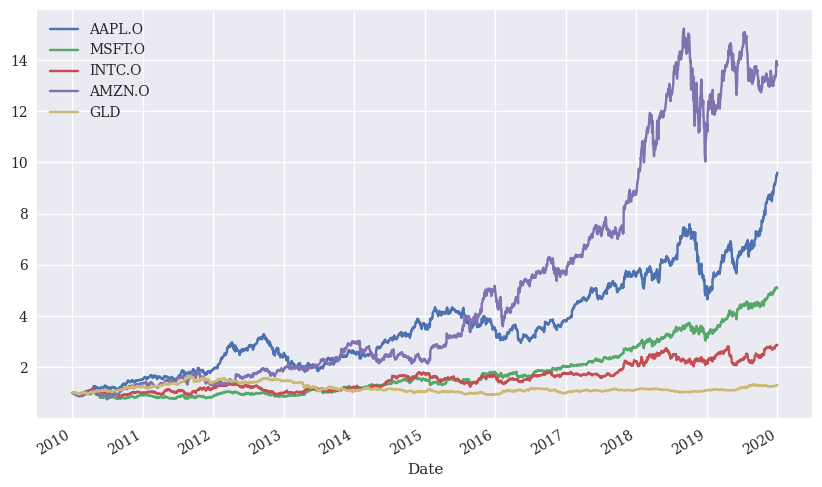

In [19]:
(raw[symbols[:]] / raw[symbols[:]].iloc[0]).plot(figsize=(10, 6));

In [20]:
weights = len(rets.columns) * [1 / len(rets.columns)]
weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [21]:
def port_return(rets, weights):
    return np.dot(rets.mean(), weights) * 252  # annualized

In [22]:
port_return(rets, weights)

np.float64(0.156947646530181)

In [23]:
def port_volatility(rets, weights):
    return np.dot(weights, np.dot(rets.cov() * 252 , weights)) ** 0.5  # annualized

In [24]:
port_volatility(rets, weights)

np.float64(0.16106507848480675)

In [25]:
def port_sharpe(rets, weights):
    return port_return(rets, weights) / port_volatility(rets, weights)

In [26]:
port_sharpe(rets, weights)

np.float64(0.9744362217225496)

In [27]:
w = np.random.random((1000, len(symbols)))
w = (w.T / w.sum(axis=1)).T

In [28]:
w[:5]

array([[ 0.082,  0.062,  0.256,  0.205,  0.395],
       [ 0.212,  0.248,  0.216,  0.048,  0.277],
       [ 0.104,  0.126,  0.274,  0.230,  0.266],
       [ 0.237,  0.018,  0.463,  0.089,  0.193],
       [ 0.276,  0.252,  0.064,  0.238,  0.170]])

In [29]:
w[:5].sum(axis=1)

array([ 1.000,  1.000,  1.000,  1.000,  1.000])

In [30]:
pvr = [(port_volatility(rets[symbols], weights),
        port_return(rets[symbols], weights))
       for weights in w]
pvr = np.array(pvr)

In [31]:
psr = pvr[:, 1] / pvr[:, 0]

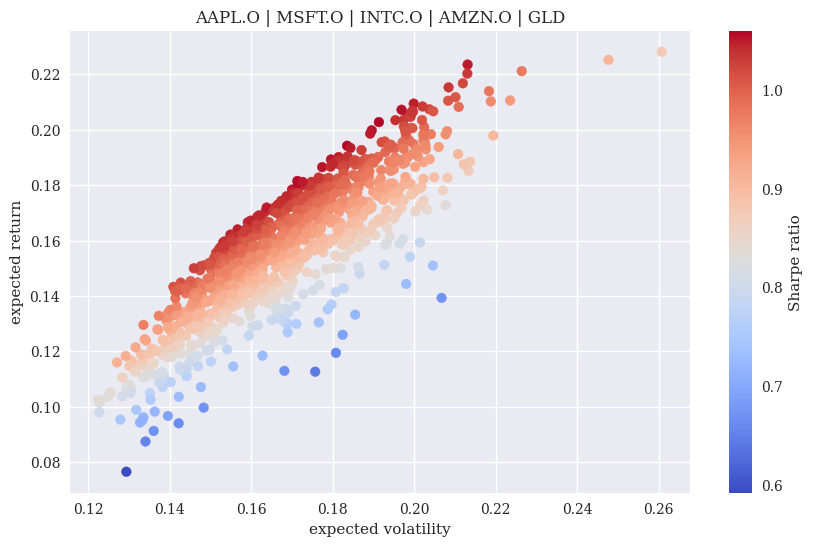

In [32]:
plt.figure(figsize=(10, 6))
fig = plt.scatter(pvr[:, 0], pvr[:, 1],
                  c=psr, cmap='coolwarm')
cb = plt.colorbar(fig)
cb.set_label('Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.title(' | '.join(symbols));

In [33]:
bnds = len(symbols) * [(0, 1),]
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [34]:
cons = {'type': 'eq', 'fun': lambda weights: weights.sum() - 1}

In [35]:
opt_weights = {}
for year in range(2010, 2019):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    ow = minimize(lambda weights: -port_sharpe(rets_, weights),
                  len(symbols) * [1 / len(symbols)],
                  bounds=bnds,
                  constraints=cons)['x']
    opt_weights[year] = ow

In [36]:
opt_weights

{2010: array([ 0.366,  0.000,  0.000,  0.056,  0.578]),
 2011: array([ 0.543,  0.000,  0.077,  0.000,  0.380]),
 2012: array([ 0.324,  0.000,  0.000,  0.471,  0.205]),
 2013: array([ 0.012,  0.305,  0.219,  0.464,  0.000]),
 2014: array([ 0.452,  0.115,  0.419,  0.000,  0.015]),
 2015: array([ 0.000,  0.000,  0.000,  1.000,  0.000]),
 2016: array([ 0.150,  0.260,  0.000,  0.058,  0.533]),
 2017: array([ 0.231,  0.203,  0.031,  0.109,  0.426]),
 2018: array([ 0.000,  0.295,  0.000,  0.705,  0.000])}

In [37]:
res = pd.DataFrame()
for year in range(2010, 2019):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    epv = port_volatility(rets_, opt_weights[year])
    epr = port_return(rets_, opt_weights[year])
    esr = epr / epv
    rets_ = rets[symbols].loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
    rpv = port_volatility(rets_, opt_weights[year])
    rpr = port_return(rets_, opt_weights[year])
    rsr = rpr / rpv
    res = pd.concat((res, pd.DataFrame({'epv': epv, 'epr': epr, 'esr': esr,
                                   'rpv': rpv, 'rpr': rpr, 'rsr': rsr},
                                  index=[year + 1])))

In [68]:
res

,epv,epr,esr,rpv,rpr,rsr
2011,0.157440,0.303003,1.924564,0.160622,0.133836,0.833235
2012,0.173279,0.169321,0.977156,0.182292,0.161375,0.885256
2013,0.202460,0.278459,1.375378,0.168714,0.166897,0.989228
2014,0.181544,0.368961,2.032353,0.197798,0.026830,0.135645
2015,0.160340,0.309486,1.930190,0.211368,-0.024560,-0.116194
2016,0.326730,0.778330,2.382179,0.296565,0.103870,0.350242
2017,0.106148,0.090933,0.856663,0.079521,0.230630,2.900235
2018,0.086548,0.260702,3.012226,0.157337,0.038234,0.243004
2019,0.323796,0.228008,0.704174,0.207672,0.275819,1.328147


In [38]:
res.mean()

epv    0.190920
epr    0.309689
esr    1.688320
rpv    0.184654
rpr    0.123659
rsr    0.838755
dtype: float64

In [39]:
res[['epv', 'rpv']].corr()

,epv,rpv
epv,1.000000,0.765733
rpv,0.765733,1.000000


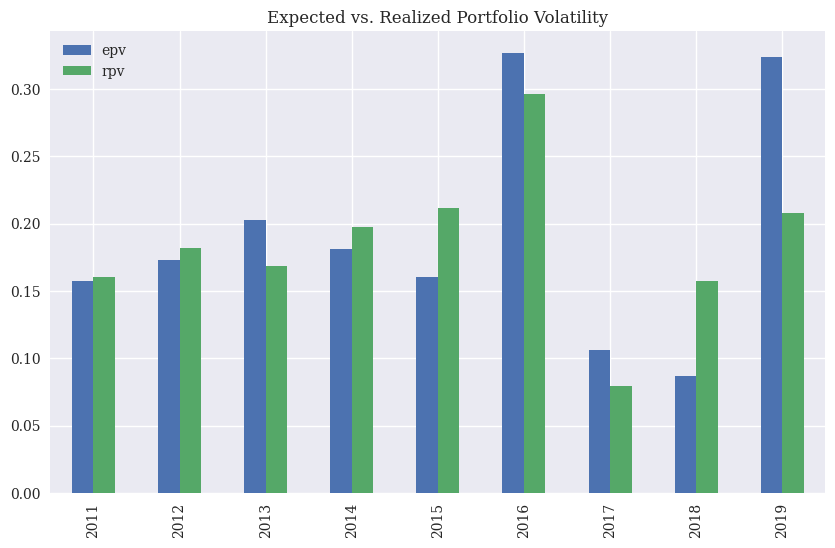

In [40]:
res[['epv', 'rpv']].plot(kind='bar', figsize=(10, 6),
        title='Expected vs. Realized Portfolio Volatility');

In [41]:
res[['epr', 'rpr']].corr()

,epr,rpr
epr,1.000000,-0.350437
rpr,-0.350437,1.000000


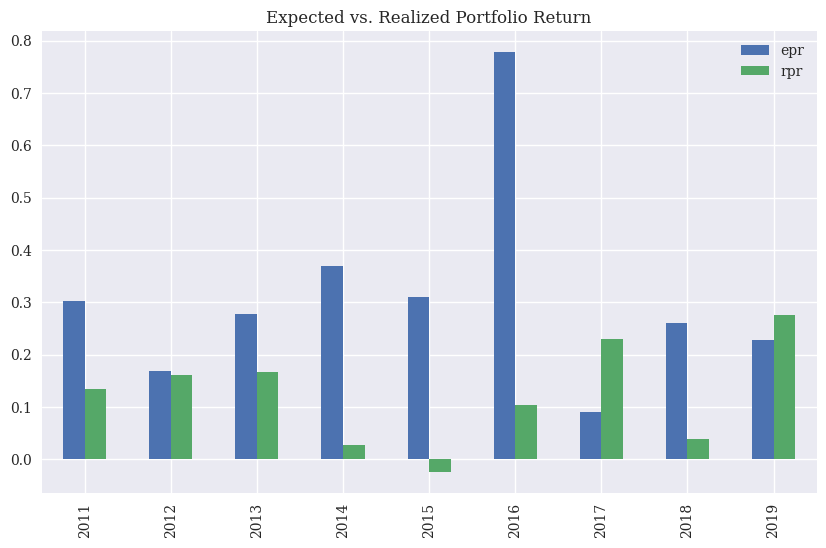

In [42]:
res[['epr', 'rpr']].plot(kind='bar', figsize=(10, 6),
        title='Expected vs. Realized Portfolio Return');

In [43]:
res[['esr', 'rsr']].corr()

,esr,rsr
esr,1.000000,-0.698607
rsr,-0.698607,1.000000


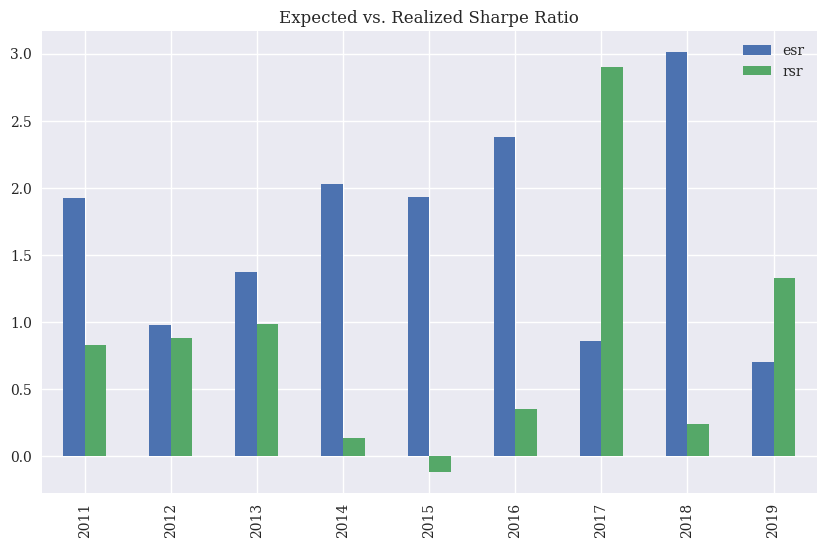

In [44]:
res[['esr', 'rsr']].plot(kind='bar', figsize=(10, 6),
        title='Expected vs. Realized Sharpe Ratio');

### Capital Asset Pricing Model

In [45]:
r = 0.005

In [46]:
market = '.SPX'

In [47]:
rets = np.log(raw / raw.shift(1)).dropna()

In [48]:
res = pd.DataFrame()

In [49]:
for sym in rets.columns[:4]:
    print('\n' + sym)
    print(54 * '=')
    for year in range(2010, 2019):
        rets_ = rets.loc[f'{year}-01-01':f'{year}-12-31']
        muM = rets_[market].mean() * 252
        cov = rets_.cov().loc[sym, market]
        var = rets_[market].var()
        beta = cov / var
        rets_ = rets.loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
        muM = rets_[market].mean() * 252
        mu_capm = r + beta * (muM - r)
        mu_real = rets_[sym].mean() * 252
        res = pd.concat((res, pd.DataFrame({'symbol': sym,
                                       'mu_capm': mu_capm,
                                       'mu_real': mu_real},
                                      index=[year + 1])),
                        sort=True)
        print('{} | beta: {:.3f} | mu_capm: {:6.3f} | mu_real: {:6.3f}'
              .format(year + 1, beta, mu_capm, mu_real))


AAPL.O
2011 | beta: 1.052 | mu_capm: -0.000 | mu_real:  0.228
2012 | beta: 0.764 | mu_capm:  0.098 | mu_real:  0.275
2013 | beta: 1.266 | mu_capm:  0.327 | mu_real:  0.053
2014 | beta: 0.630 | mu_capm:  0.070 | mu_real:  0.320
2015 | beta: 0.833 | mu_capm: -0.005 | mu_real: -0.047
2016 | beta: 1.144 | mu_capm:  0.103 | mu_real:  0.096
2017 | beta: 1.009 | mu_capm:  0.180 | mu_real:  0.381
2018 | beta: 1.379 | mu_capm: -0.091 | mu_real: -0.071
2019 | beta: 1.252 | mu_capm:  0.316 | mu_real:  0.621

MSFT.O
2011 | beta: 0.890 | mu_capm:  0.001 | mu_real: -0.072
2012 | beta: 0.816 | mu_capm:  0.104 | mu_real:  0.029
2013 | beta: 1.109 | mu_capm:  0.287 | mu_real:  0.337
2014 | beta: 0.876 | mu_capm:  0.095 | mu_real:  0.216
2015 | beta: 0.955 | mu_capm: -0.007 | mu_real:  0.178
2016 | beta: 1.249 | mu_capm:  0.113 | mu_real:  0.113
2017 | beta: 1.224 | mu_capm:  0.217 | mu_real:  0.321
2018 | beta: 1.303 | mu_capm: -0.086 | mu_real:  0.172
2019 | beta: 1.442 | mu_capm:  0.364 | mu_real:  

In [50]:
sym = 'AMZN.O'

In [51]:
res[res['symbol'] == sym][['mu_capm', 'mu_real']].corr()

,mu_capm,mu_real
mu_capm,1.000000,-0.004826
mu_real,-0.004826,1.000000


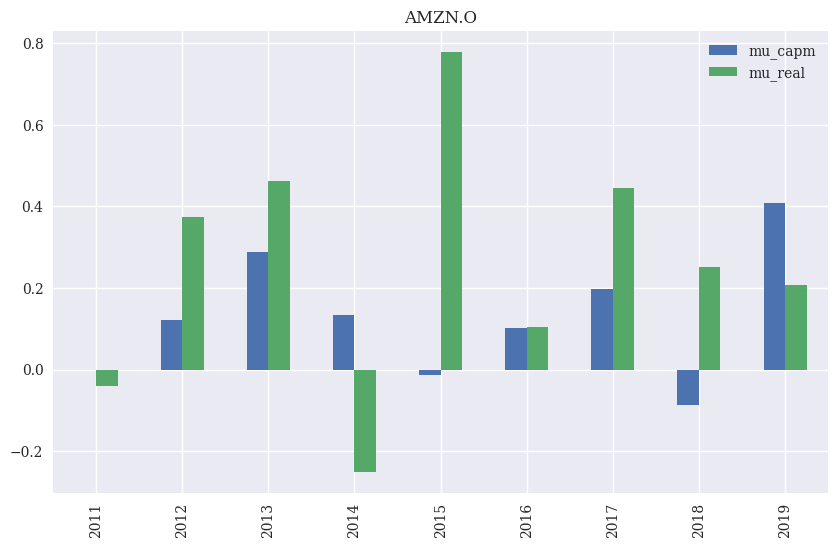

In [52]:
res[res['symbol'] == sym].plot(kind='bar',
                figsize=(10, 6), title=sym);

In [53]:
grouped = res.groupby('symbol').mean()
grouped

,mu_capm,mu_real
symbol,,
AAPL.O,0.110855,0.206158
AMZN.O,0.128223,0.259395
INTC.O,0.117929,0.116180
MSFT.O,0.120844,0.192655


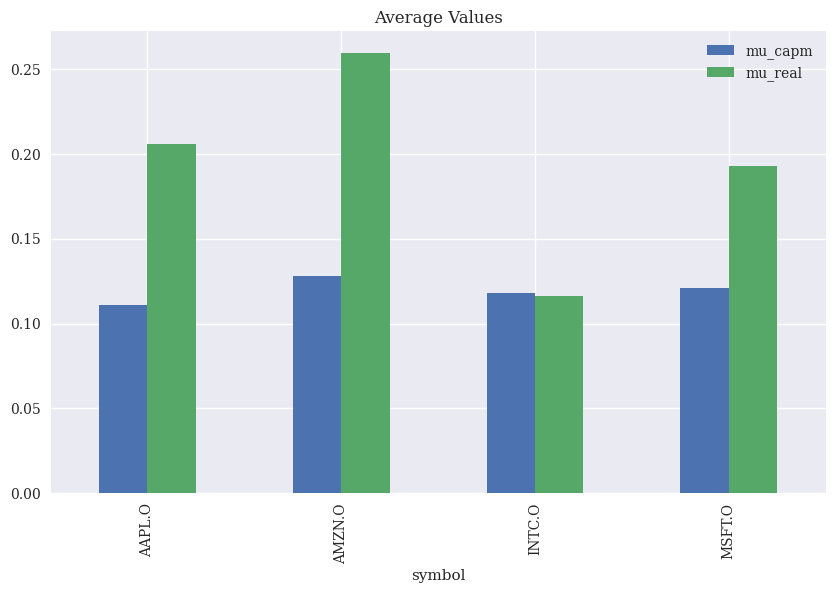

In [85]:
grouped.plot(kind='bar', figsize=(10, 6), title='Average Values');

### Arbitrage-Pricing Theory

In [54]:
factors = ['.SPX', '.VIX', 'EUR=', 'XAU=']

In [55]:
res = pd.DataFrame()

In [56]:
np.set_printoptions(formatter={'float': lambda x: f'{x:5.2f}'})

In [57]:
for sym in rets.columns[:4]:
    print('\n' + sym)
    print(71 * '=')
    for year in range(2010, 2019):
        rets_ = rets.loc[f'{year}-01-01':f'{year}-12-31']
        reg = np.linalg.lstsq(rets_[factors],
                              rets_[sym], rcond=-1)[0]
        rets_ = rets.loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
        mu_apt = np.dot(rets_[factors].mean() * 252, reg)
        mu_real =  rets_[sym].mean() * 252
        res = pd.concat((res, pd.DataFrame({'symbol': sym,
                        'mu_apt': mu_apt, 'mu_real': mu_real},
                         index=[year + 1])))
        print('{} | fl: {} | mu_apt: {:6.3f} | mu_real: {:6.3f}'
              .format(year + 1, reg.round(2), mu_apt, mu_real))


AAPL.O
2011 | fl: [ 0.91 -0.04 -0.35  0.12] | mu_apt:  0.011 | mu_real:  0.228
2012 | fl: [ 0.76 -0.02 -0.24  0.05] | mu_apt:  0.099 | mu_real:  0.275
2013 | fl: [ 1.67  0.04 -0.56  0.10] | mu_apt:  0.366 | mu_real:  0.053
2014 | fl: [ 0.53 -0.00  0.02  0.16] | mu_apt:  0.050 | mu_real:  0.320
2015 | fl: [ 1.07  0.02  0.25  0.01] | mu_apt: -0.038 | mu_real: -0.047
2016 | fl: [ 1.21  0.01 -0.14 -0.02] | mu_apt:  0.110 | mu_real:  0.096
2017 | fl: [ 1.10  0.01 -0.15 -0.02] | mu_apt:  0.170 | mu_real:  0.381
2018 | fl: [ 1.06 -0.03 -0.15  0.12] | mu_apt: -0.088 | mu_real: -0.071
2019 | fl: [ 1.37  0.01 -0.20  0.13] | mu_apt:  0.364 | mu_real:  0.621

MSFT.O
2011 | fl: [ 0.98  0.01  0.02 -0.11] | mu_apt: -0.008 | mu_real: -0.072
2012 | fl: [ 0.82  0.00 -0.03 -0.01] | mu_apt:  0.103 | mu_real:  0.029
2013 | fl: [ 1.14  0.00 -0.07 -0.01] | mu_apt:  0.294 | mu_real:  0.337
2014 | fl: [ 1.28  0.05  0.04  0.07] | mu_apt:  0.149 | mu_real:  0.216
2015 | fl: [ 1.20  0.03  0.05  0.01] | mu_apt: -

In [58]:
sym = 'AMZN.O'

In [59]:
res[res['symbol'] == sym][['mu_apt', 'mu_real']].corr()

,mu_apt,mu_real
mu_apt,1.000000,-0.098281
mu_real,-0.098281,1.000000


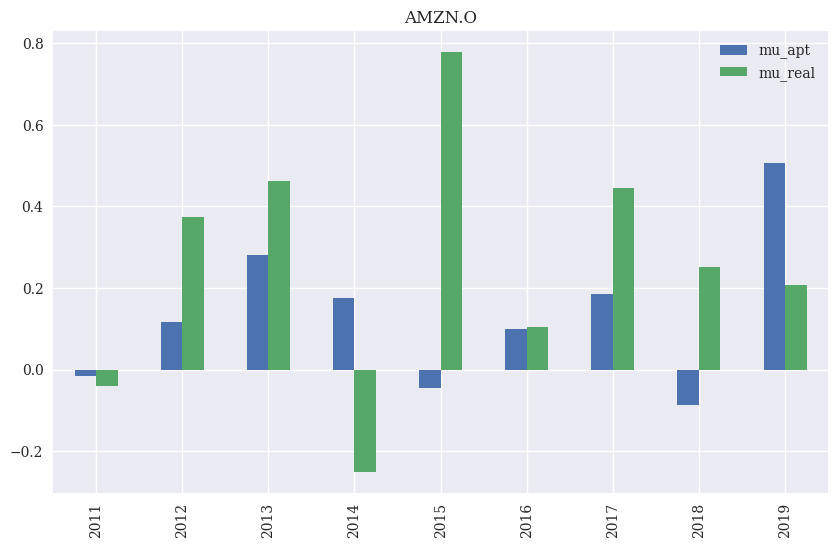

In [60]:
res[res['symbol'] == sym].plot(kind='bar',
                figsize=(10, 6), title=sym);

In [61]:
grouped = res.groupby('symbol').mean()
grouped

,mu_apt,mu_real
symbol,,
AAPL.O,0.116116,0.206158
AMZN.O,0.135528,0.259395
INTC.O,0.124811,0.116180
MSFT.O,0.128441,0.192655


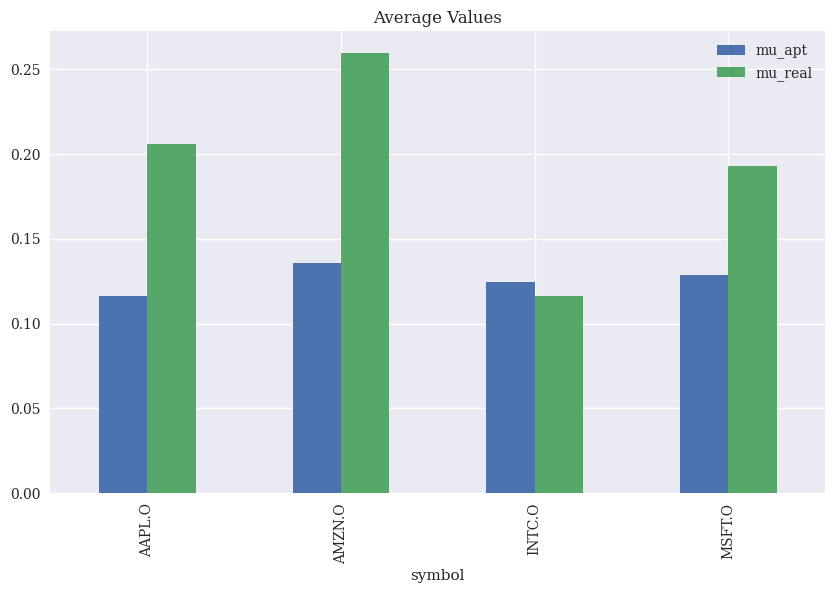

In [62]:
grouped.plot(kind='bar', figsize=(10, 6), title='Average Values');

In [63]:
factors = pd.read_csv('http://hilpisch.com/aiif_eikon_eod_factors.csv',
                      index_col=0, parse_dates=True)

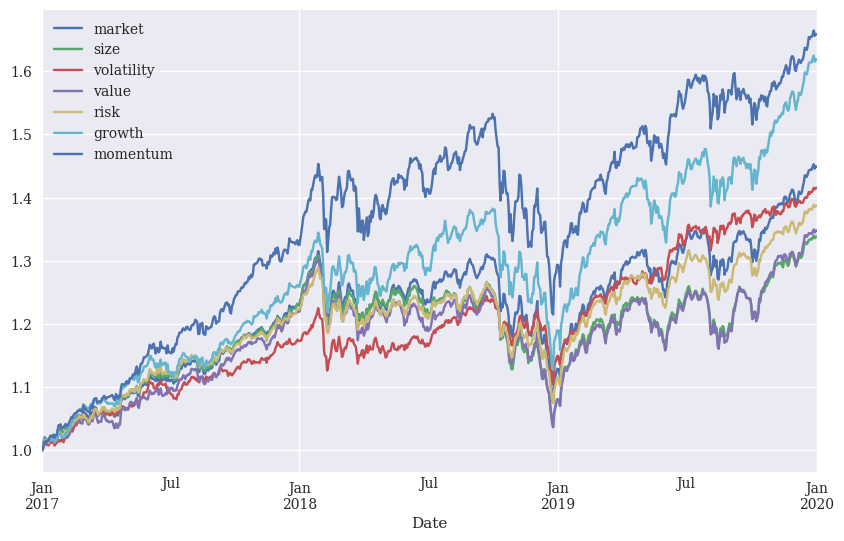

In [64]:
(factors / factors.iloc[0]).plot(figsize=(10, 6));

In [65]:
start = '2017-01-01'
end = '2020-01-01'

In [66]:
retsd = rets.loc[start:end].copy()
retsd.dropna(inplace=True)

In [67]:
retsf = np.log(factors / factors.shift(1))
retsf = retsf.loc[start:end]
retsf.dropna(inplace=True)
retsf = retsf.loc[retsd.index].dropna()

In [68]:
retsf.corr()

,market,size,volatility,value,risk,growth,momentum
market,1.000000,0.935867,0.845010,0.964124,0.947150,0.959038,0.928705
size,0.935867,1.000000,0.791767,0.965739,0.983238,0.835477,0.796420
volatility,0.845010,0.791767,1.000000,0.778294,0.865467,0.818280,0.819585
value,0.964124,0.965739,0.778294,1.000000,0.958359,0.864222,0.818796
risk,0.947150,0.983238,0.865467,0.958359,1.000000,0.858546,0.825563
growth,0.959038,0.835477,0.818280,0.864222,0.858546,1.000000,0.952956
momentum,0.928705,0.796420,0.819585,0.818796,0.825563,0.952956,1.000000


In [69]:
res = pd.DataFrame()

In [70]:
np.set_printoptions(formatter={'float': lambda x: f'{x:5.2f}'})

In [71]:
split = int(len(retsf) * 0.5)
for sym in rets.columns[:4]:
    print('\n' + sym)
    print(74 * '=')
    retsf_, retsd_ = retsf.iloc[:split], retsd.iloc[:split]
    reg = np.linalg.lstsq(retsf_, retsd_[sym], rcond=-1)[0]   
    retsf_, retsd_ = retsf.iloc[split:], retsd.iloc[split:]
    mu_apt = np.dot(retsf_.mean() * 252, reg)
    mu_real =  retsd_[sym].mean() * 252
    res = pd.concat((res, pd.DataFrame({'mu_apt': mu_apt,
                    'mu_real': mu_real}, index=[sym,])),
                    sort=True)
    print('fl: {} | apt: {:.3f} | real: {:.3f}'
          .format(reg.round(1), mu_apt, mu_real))


AAPL.O
fl: [ 2.30  2.80 -0.70 -1.40 -4.20  2.00 -0.20] | apt: 0.115 | real: 0.301

MSFT.O
fl: [ 1.50  0.00  0.10 -1.30 -1.40  0.80  1.00] | apt: 0.181 | real: 0.304

INTC.O
fl: [-3.10  1.60  0.40  1.30 -2.60  2.50  1.10] | apt: 0.186 | real: 0.118

AMZN.O
fl: [ 9.10  3.30 -1.00 -7.10 -3.10 -1.80  1.20] | apt: 0.019 | real: 0.050


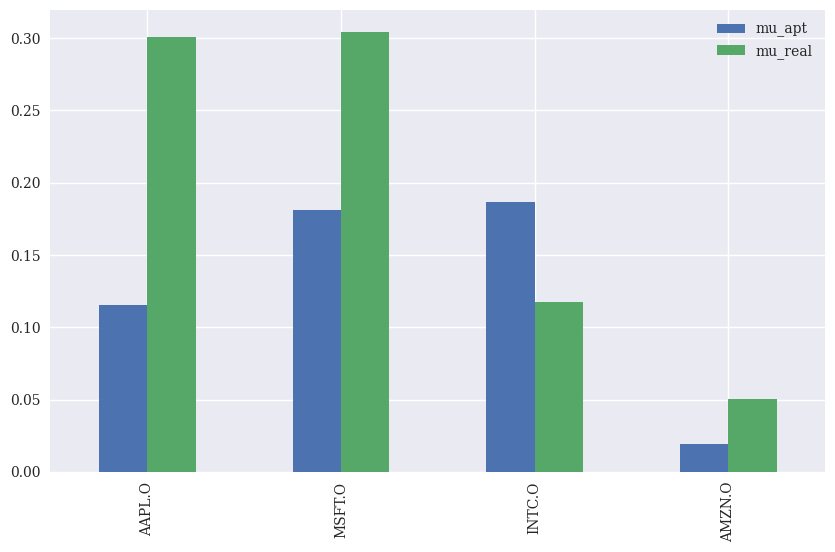

In [72]:
res.plot(kind='bar', figsize=(10, 6));

In [73]:
sym

'AMZN.O'

In [74]:
rets_sym = np.dot(retsf_, reg)

In [75]:
rets_sym = pd.DataFrame(rets_sym,
                        columns=[sym + '_apt'],
                        index=retsf_.index)

In [76]:
rets_sym[sym + '_real'] = retsd_[sym]

In [77]:
rets_sym.mean() * 252

AMZN.O_apt     0.019401
AMZN.O_real    0.050344
dtype: float64

In [78]:
rets_sym.std() * 252 ** 0.5

AMZN.O_apt     0.270995
AMZN.O_real    0.307653
dtype: float64

In [111]:
rets_sym.corr()

,AMZN.O_apt,AMZN.O_real
AMZN.O_apt,1.000000,0.832218
AMZN.O_real,0.832218,1.000000


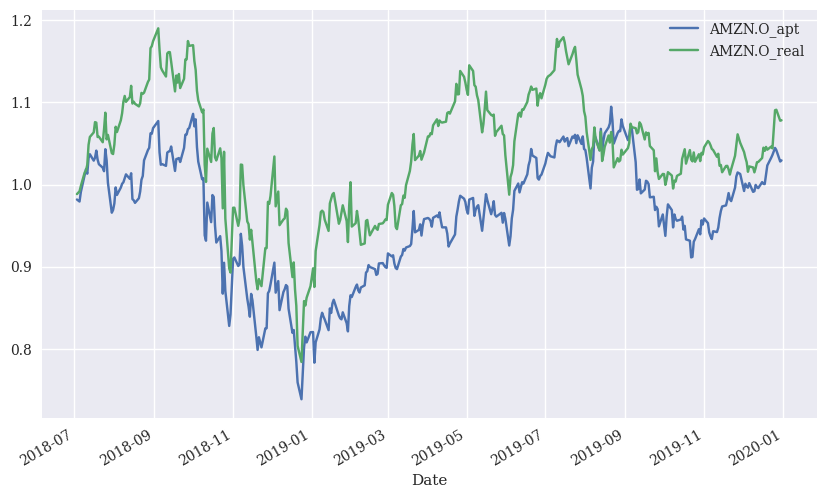

In [79]:
rets_sym.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [80]:
rets_sym['same'] = (np.sign(rets_sym[sym + '_apt']) ==
                    np.sign(rets_sym[sym + '_real']))

In [81]:
rets_sym['same'].value_counts()

same
True     288
False     89
Name: count, dtype: int64

In [82]:
rets_sym['same'].value_counts()[True] / len(rets_sym)

np.float64(0.7639257294429708)

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>